In [1]:
import numpy as np
import tensorflow as tf
import scipy.stats as stats
import matplotlib.pyplot as plt
import tqdm
%matplotlib inline

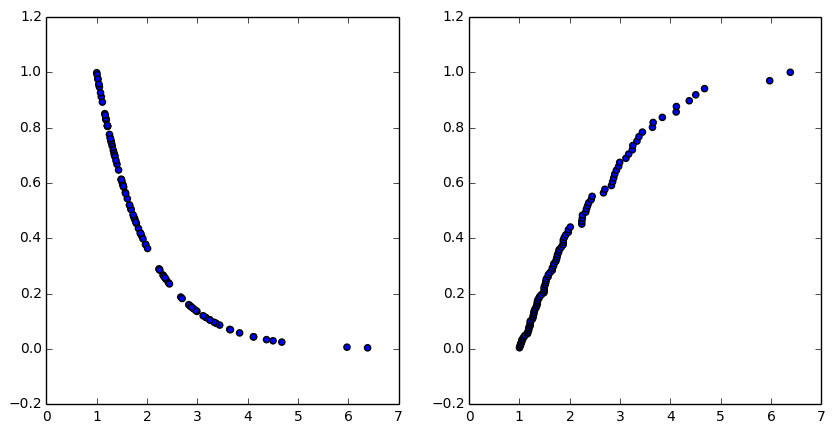

In [44]:
dist = stats.gamma(1,1)
x = dist.rvs(100)
plt.figure(figsize=(10,5))
fx = dist.pdf(x)
plt.subplot(121)
plt.scatter(x,fx)
x.sort()
Fx = x.cumsum()/x.sum()
plt.subplot(122)
plt.scatter(x,Fx)
plt.show()

# Normalize
x -= x.mean()
x /= x.std()

fit = np.polyfit(x.flatten(),Fx.flatten(),5)
poly = np.poly1d(fit)
polyFit = poly(x)


$$ y = a + bx + cx^2 + dx^4$$
$$ y(0) = 0 $$
$$ y(1) = 0 $$
$$ y(1) = b + c + d, b = 1 - c - d $$

In [42]:
X = tf.placeholder(tf.float32,[None,1])
Y = tf.placeholder(tf.float32,[None,1])

a = tf.Variable(tf.random_normal([1,1],stddev=0.05),name="a")
b = tf.Variable(tf.random_normal([1,1],stddev=0.05),name="b")
c = tf.Variable(tf.random_normal([1,1],stddev=0.05),name="c")
d = tf.Variable(tf.random_normal([1,1],stddev=0.05),name="d")
e = tf.Variable(tf.random_normal([1,1],stddev=0.05),name="e")

yPred = a + tf.mul(b,X) + tf.mul(c,tf.pow(X,2)) 
#+ tf.mul(d,tf.pow(X,3)) + tf.mul(e,tf.pow(X,4))

mse = tf.reduce_mean(tf.square(tf.sub(Y, yPred)))
learningRate = tf.constant(0.05,tf.float32)
train = tf.train.AdagradOptimizer(learningRate).minimize(mse)


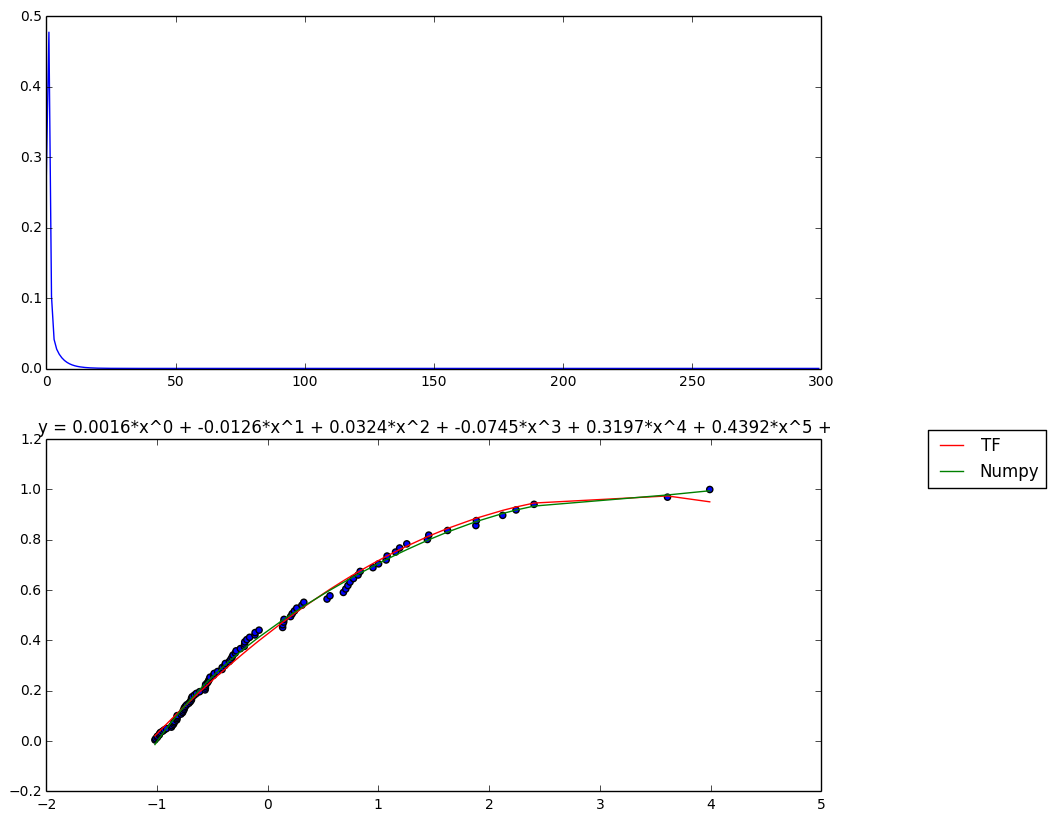

In [46]:
init_op = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init_op)
    x = x.reshape(-1,1)
    Fx = Fx.reshape(-1,1)
    nIterations = 300
    losses = np.zeros(nIterations)
    lr = 0.3
    for i in range(nIterations):
        _,losses[i],yPred_ = sess.run([train,mse,yPred],feed_dict={X:x,Y:Fx,learningRate:lr})
        lr /= 1.01
    weights = [w.eval() for w in tf.trainable_variables()]
        
    polyTitle = "y = "
    for i in range(poly.coeffs.size):
        polyTitle += "{1:0.4f}*x^{0} + ".format(i,poly.coeffs[i])
        
        
    finalFit = yPred.eval(feed_dict={X:x})    
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(np.arange(len(losses)),losses)
    plt.subplot(212)
    title = "Np weights = {0}".format(poly.coeffs)
    plt.title(polyTitle)
    plt.plot(x,finalFit,"r",label = "TF")
    plt.plot(x,polyFit,"g",label = "Numpy")
    plt.scatter(x,Fx)
    plt.legend(bbox_to_anchor=(1.3, 1.05))
    plt.show()
    sess.close()